<a href="https://colab.research.google.com/github/hye0ngyun/TIL/blob/main/2_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%ED%99%9C%EC%84%B1%ED%99%94%ED%95%A8%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신경망
![neural network](https://miro.medium.com/max/440/0*Cq09Qw6Rhouay8Bg.png)  

- 신경망은 실제로 뉴런이 연결되는 방식은 퍼셉트론과 다를 것이 없다.
- 퍼셉트론과 신경망이 다른 점은 층수와 활성화 함수에서 차이가 난다.
  - **단순 퍼셉트론**은 단층 네트워크에서 **계단 함수**(임계값을 경계로 출력이 바뀌는 함수)를 활성화 함수로 사용한 모델이다.
  - **신경망**은 여러 층으로 구성되고 **시그모이드 함수** 등의 매끈한 활성화 함수를 사용하는 네트워크이고 **다층 퍼셉트론**이라고 합니다.  



## 활성화 함수
- 인공 신경망의 퍼셉트론을 **유닛, 노드, 뉴런**이라고 표현
  - 어떤 입력($x$)가 유닛, 노드, 뉴런으로 입력되 면 각각의 출력을 낸다.
- **퍼셉트론**이란 뉴런은 결과물로써 0과 1을 낸다.
  - $z=w_1x_1+w_2x_2+b$의 결과를 0과 1로 낸다.
- 활성화 함수란?
  - $WX+b$의 결과물을 결정하기 위한 함수

### 계단 함수
- $
y = h(b + w_1x_1 + w_1x_2)
$
- $
h(x) = \begin{cases}
0\enspace(x \leq 0)
\\ 1\enspace(x > 0)
\end{cases}
$

In [1]:
# 
def step_function(x):
  if x > 0:
    return 1
  else:
    return 0

In [2]:
def step_function(x):
  y = x > 0
  return y.astype(np.int)

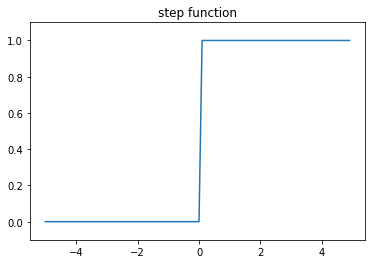

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.title('step function')
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 시그모이드
- 어떤 값이 들어오던지 **0과 1사이의 값**이 출력된다.
- 시그모이드 함수는 **이 만큼 강하게 활성화가 된다(1에 가까운 실수)**, **이 만큼 약하게 활성화가 된다(0에 가까운 실수)**라고 확인할 수 있다.
- 출력 과정( 신경망의 결정에서의 의미 )에서는 0 또는 1이 될 **확률**을 의미한다. - 출력층 에서의 시그모이드
  - 0.5를 기준으로 0.5보다 작으면 0으로 분류될 확률이 크다.
  - 0.5를 기준으로 0.5보다 크면 1로 분류될 확률이 크다.
  - **1로 분류될 확률이 시그모이드의 결과**
    - 예시 : $\sigma(z)=0.4$라면?
      - 1로 분류될 확률이 40%
      - 0으로 분류될 확률이 60%
- $
\sigma(z) =  \frac{\mathrm{1} }{\mathrm{1} + e^{-z} }
$, $z=WX+b$

In [4]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

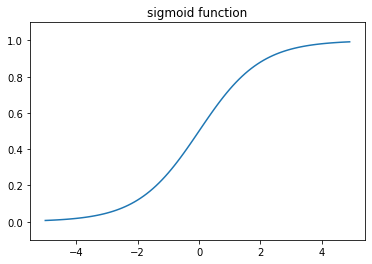

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.title('sigmoid function')
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### RELU
- 이미지 처리에 주로 사용
  - 요즘은 다양한 분야에서 활용되는중
- CNN과 자주 사용되는 함수
- 입력값이 0을 넘으면 그대로 출력, 0이하면 0을 출력
- $a(x) = \begin{cases} 
0\enspace(x \leq 0)
\\ x\enspace(x > 0) \end{cases}$


In [6]:
def RELU(x):
  return np.maximum(0, x)

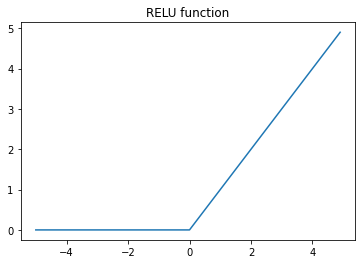

In [7]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-5.0, 5.0, 0.1)
y = RELU(x)
plt.title('RELU function')
plt.plot(x, y)
# plt.ylim(-0.1, 1.1)
plt.show()

#### ReLU를 사용하는 이유
* 최근에는 시그모이드 보다는 비선형 직선을 여러개 연결하는 ReLU를 더 많이 사용하는 추세
  * $\sigma$함수는 곡선함수라서 연산 비용(CPU, GPU 등의 연산)이 많이 들어간다.
  * 따라서 필요에 따라 ReLU를 여러 개 붙여서 사용 하는 것이 도움이 될 때가 많다.
  * 물론 데이터의 종류나 특징에 따라 성능은 다르다.
* 이미지 처리에서 ReLU를 사용하는 이유
  * 이미지는 0 ~ 255 까지의 정수로 이루어져 있다.
  * 이미지도 신경망의 연산에 따라서 실수(float)로 값이 변경된다.($WX+b$)
  * 연산에 의해 실수화 되다 보니 음수값이 등장하기 시작
  * 이미지 시스템에서 음수는 사용하지 않는 데이터이기 때문에, 음수로 연산된 데이터를 0으로 만들어서 연산의 부담을 줄여준다.
* 최근에는 Leakly ReLU도 자주 사용하는 추세
  * 음수 데이터를 0으로 처리하는 것이 아닌, 0.01 같은 작은 값을 곱해서 음수 데이터를 약하게 처리하는 방식

### 하이퍼볼릭 탄젠트(tanh)
- **텍스트 처리**에 주로 사용
- 시그모이드와 비슷하나 y가 -1 ~ 1사이의 값으로 출력
  - 시그모이드는 **확률**(0 ~ 1)을 의미
  - 하이퍼볼릭 탄젠트는 **방향**을 의미

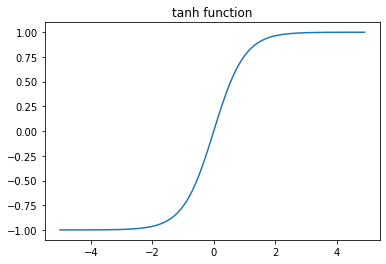

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-5.0, 5.0, 0.1)
y = np.tanh(x)
plt.title('tanh function')
plt.plot(x, y)
# plt.ylim(-0.1, 1.1)
plt.show()